### This is a notebook for comparing predicted segmentation with ground truth segmentations

In [1]:
import numpy as np
from cellpose import utils, dynamics, metrics
from numba import jit
from scipy.optimize import linear_sum_assignment
from scipy.ndimage import convolve, mean
import glob
import matplotlib.pyplot as plt

In [2]:
x = "tile_0002_0029_seg.npy"
print(x.split('_')[-2][2:])

29


In [7]:
!ls ../data/groundtruth_sample/

tile_0002_0025_seg.npy	tile_0002_0028_seg.npy	tile_0002_0031_seg.npy
tile_0002_0026_seg.npy	tile_0002_0029_seg.npy	tile_0002_0033_seg.npy
tile_0002_0027_seg.npy	tile_0002_0030_seg.npy


### Loading of *_seg.npy files which contains 

In [19]:
# Path to directory containing .npy files
groundtruth_files_path = "../data/groundtruth_sample/"
predicted_files_path = "../data/predicted_sample//"

# Get list of all .npy files in the directory and sort them in numerical order
groundtruth_files = sorted(glob.glob(f"{groundtruth_files_path}/*.npy"), key=lambda x: int(x.split('_')[-2][2:]))
predicted_files = sorted(glob.glob(f"{predicted_files_path}/*.npy"), key=lambda x: int(x.split('_')[-2][2:]))

# Load each .npy file into a list and extract only the 'masks' field
groundtruth_list = [np.load(file, allow_pickle=True).item()['masks'] for file in groundtruth_files]
predicted_list = [np.load(file, allow_pickle=True).item()['masks'] for file in predicted_files]

print("Number of .npy files loaded:", len(groundtruth_list), "\n")

# Accessing the 'masks' directly from the lists
masks_true = groundtruth_list
masks_pred = predicted_list

#print(groundtruth_files, "\n")
#print(predicted_files, "\n")

Number of .npy files loaded: 8 



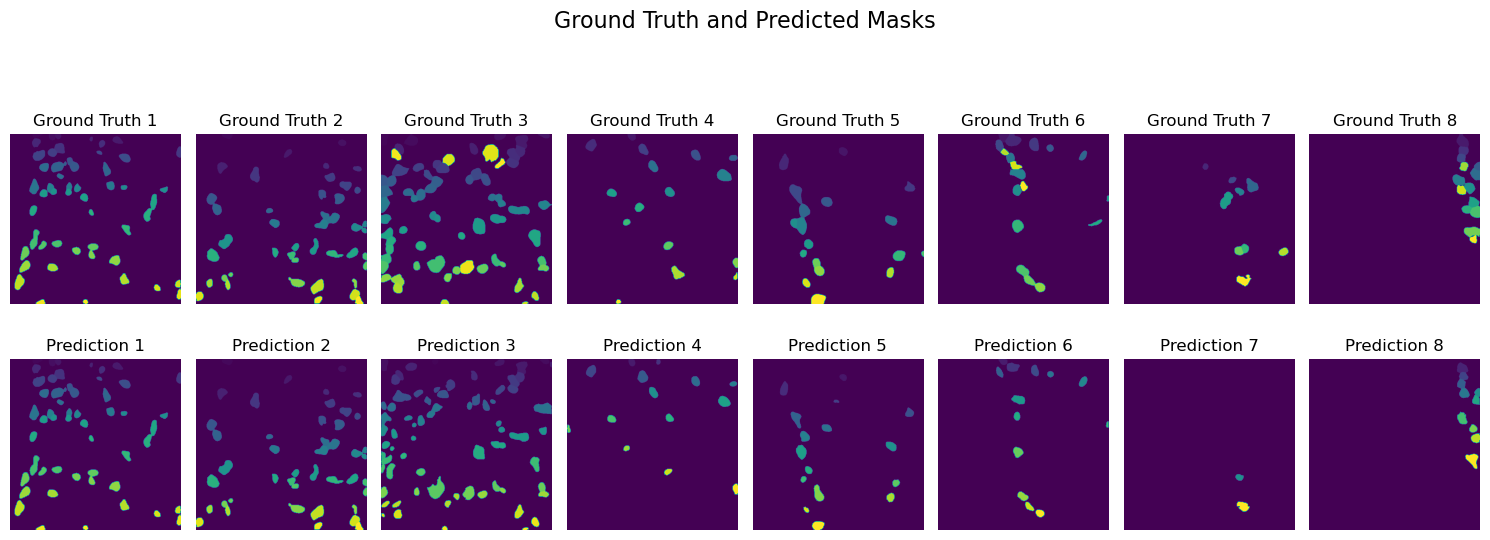

In [20]:
# Define the number of samples to plot (adjust as needed)
num_samples = min(len(masks_true), 8)  # Ensure it doesn't exceed the available data

# Create a grid: 2 rows (ground truth and predictions), `num_samples` columns
fig, axes = plt.subplots(2, num_samples, figsize=(15, 6))

# Plot ground truth masks in the first row
for i in range(num_samples):
    axes[0, i].imshow(masks_true[i], cmap='viridis')
    axes[0, i].set_title(f"Ground Truth {i+1}")
    axes[0, i].axis('off')

# Plot predicted masks in the second row
for i in range(num_samples):
    axes[1, i].imshow(masks_pred[i], cmap='viridis')
    axes[1, i].set_title(f"Prediction {i+1}")
    axes[1, i].axis('off')

# Add a common title and adjust layout
plt.suptitle("Ground Truth and Predicted Masks", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [23]:
avr_precision = metrics.aggregated_jaccard_index(masks_true, masks_pred)
print("average precision:\n")
for i, num in enumerate(avr_precision):
    print(f"Preccision of image {i} is {num}")

average precision:

Preccision of image 0 is 1.0
Preccision of image 1 is 1.0
Preccision of image 2 is 0.598136284216657
Preccision of image 3 is 0.6006802040612184
Preccision of image 4 is 0.6215201060539107
Preccision of image 5 is 0.5402692983189763
Preccision of image 6 is 0.17658087608658599
Preccision of image 7 is 0.5102002266717038


In [40]:
!ls ../data/groundtruth_sample/

tile_0002_0025_seg.npy	tile_0002_0028_seg.npy	tile_0002_0031_seg.npy
tile_0002_0026_seg.npy	tile_0002_0029_seg.npy	tile_0002_0033_seg.npy
tile_0002_0027_seg.npy	tile_0002_0030_seg.npy


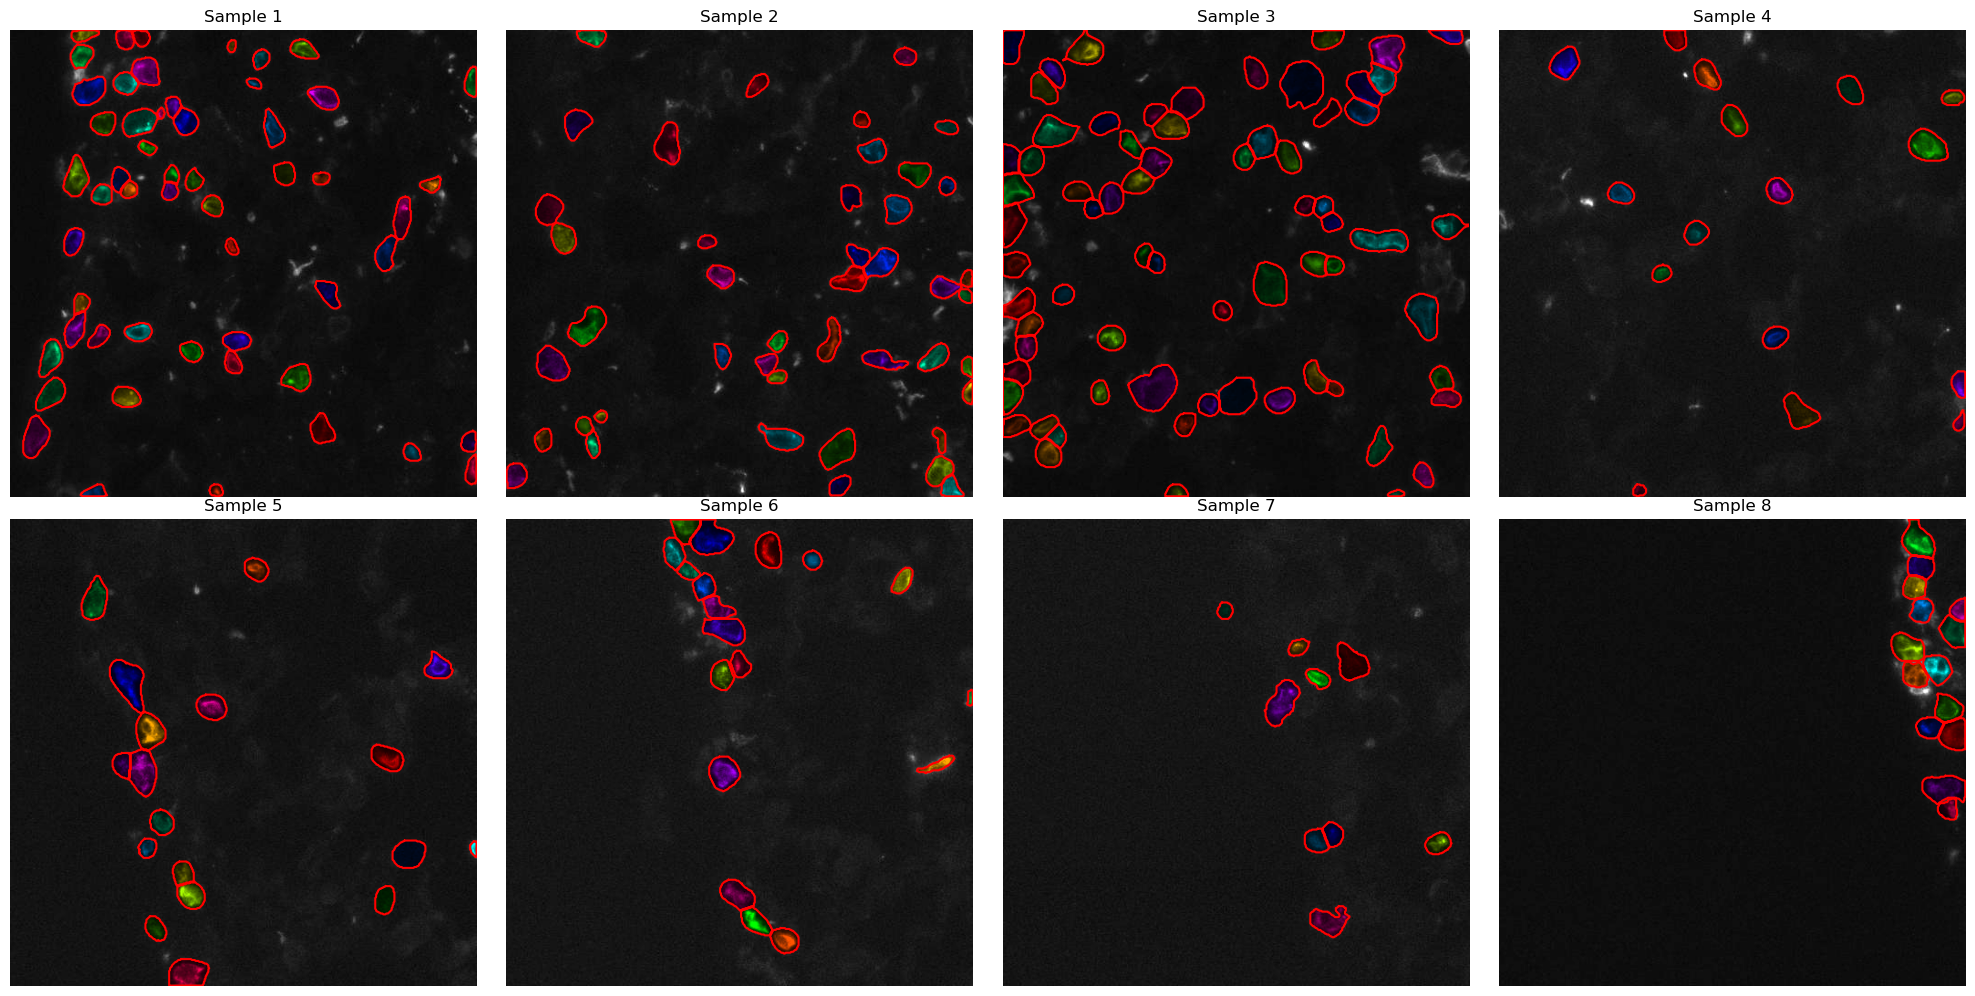

In [59]:
import numpy as np
import os
import matplotlib.pyplot as plt
from cellpose import plot, utils, io

# List of files in the directories
jpg_files = [file for file in os.listdir("../data/raw_sample/") if file.endswith('.jpg')]
seg_files = [file for file in os.listdir("../data/groundtruth_sample/") if file.endswith('.npy')]

# Determine number of rows and columns for the subplot
num_images = len(jpg_files)
num_cols = num_images // 2  # Integer division for columns
num_rows = 2 if num_images % 2 == 0 else 3  # Use 3 rows if the number of images is odd

# Create subplots with 2 rows and appropriate number of columns
fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))

# Flatten axes for easier indexing in case we have multiple rows
axes = axes.flatten()

# Iterate through the files
for i, jpg_file in enumerate(jpg_files):
    # Load the image file
    img = io.imread(os.path.join('../data/raw_sample/', jpg_file))
    
    # Load the ground truth mask data (.npy files)
    seg_file = seg_files[i]
    dat = np.load(os.path.join('../data/groundtruth_sample/', seg_file), allow_pickle=True).item()
    
    # Plot image with masks overlaid
    mask_overlay = plot.mask_overlay(img, dat['masks'])
    
    # Plot image with outlines overlaid in red
    outlines = utils.outlines_list(dat['masks'])
    
    # Use the appropriate axis to plot the image
    ax = axes[i]
    ax.imshow(mask_overlay)
    for o in outlines:
        ax.plot(o[:, 0], o[:, 1], color='r')
    
    ax.set_title(f"Sample {i + 1}")
    ax.axis('off')

# Adjust the layout to prevent overlapping subplots
plt.tight_layout()
plt.show()

In [51]:
dat.keys()

dict_keys(['outlines', 'colors', 'masks', 'chan_choose', 'filename', 'flows', 'ismanual', 'manual_changes', 'model_path', 'flow_threshold', 'cellprob_threshold', 'normalize_params', 'restore', 'ratio', 'diameter'])